In [ ]:
# Import of libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import metrics as m
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import  learning_curve
from sklearn.ensemble import RandomForestClassifier
from matplotlib.colors import ListedColormap
from sklearn import  datasets, tree 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score

In [ ]:
data = pd.read_csv("/content/bioresponse.csv")
data.head()

,Activity,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,D16,D17,D18,D19,D20,D21,D22,D23,D24,D25,D26,D27,D28,D29,D30,D31,D32,D33,D34,D35,D36,D37,D38,D39,...,D1737,D1738,D1739,D1740,D1741,D1742,D1743,D1744,D1745,D1746,D1747,D1748,D1749,D1750,D1751,D1752,D1753,D1754,D1755,D1756,D1757,D1758,D1759,D1760,D1761,D1762,D1763,D1764,D1765,D1766,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
0,1,0.000000,0.497009,0.10,0.0,0.132956,0.678031,0.273166,0.585445,0.743663,0.243144,0.187856,0.0000,0.000000,0.069000,0.362012,0.301773,0.597930,0.190813,0.107219,0.070500,0.00717,0.137931,1,0.00,0.496683,0.753131,1,1,0.000000,0.262919,0.077200,0.082700,0.200590,0.00000,0.000000,0.0,0.0,0.162383,0.150153,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0.366667,0.606291,0.05,0.0,0.111209,0.803455,0.106105,0.411754,0.836582,0.106480,0.101382,0.1875,0.193548,0.131001,0.350206,0.187419,0.762669,0.180473,0.329962,0.107681,0.01950,0.206897,0,0.75,0.449869,0.720484,0,0,0.666667,0.099400,0.289240,0.216710,0.100295,0.16958,0.235294,0.0,0.0,0.119104,0.075100,...,0,1,1,0,0,0,1,1,0,1,0,0,1,0,1,1,1,0,0,0,1,0,0,0,1,0,1,1,0,0,1,1,1,1,0,1,0,0,1,0
2,1,0.033300,0.480124,0.00,0.0,0.209791,0.610350,0.356453,0.517720,0.679051,0.352308,0.193548,0.1250,0.000000,0.068900,0.574628,0.283327,0.510633,0.184480,0.073300,0.061600,0.00566,0.000000,1,0.00,0.486610,0.803577,0,1,0.000000,0.428659,0.032400,0.072400,0.000000,0.03930,0.000000,0.0,0.0,0.076100,0.225229,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0.000000,0.538825,0.00,0.5,0.196344,0.724230,0.235606,0.288764,0.805110,0.208989,0.000000,0.0000,0.000000,0.145947,0.584688,0.325247,0.496745,0.242288,0.087700,0.075300,0.01680,0.000000,1,0.00,0.459122,0.829482,0,1,0.000000,0.435410,0.118562,0.000000,0.000000,0.00000,0.000000,0.0,0.0,0.068900,0.000000,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0.100000,0.517794,0.00,0.0,0.494734,0.781422,0.154361,0.303809,0.812646,0.125177,0.532258,0.0000,0.000000,0.094900,0.540323,0.116775,0.552982,0.167897,0.116140,0.054200,0.01350,0.103448,1,0.00,0.381883,0.913374,0,1,0.000000,0.305333,0.054100,0.170822,0.000000,0.00000,0.176471,0.0,0.0,0.019900,0.057400,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
#Check that predicted variable is 0 or 1
data.Activity.unique()

array([1, 0])

In [ ]:
#Split the sample into train and test
train_data, test_data, train_labels, test_labels = train_test_split(data.drop(columns = ['Activity']), data.Activity, test_size = 0.2, random_state = 1)

Task 1.1\
Train classifiers with sklearn library\
Small Decision Tree with maximum depth equal to 2 

In [ ]:
tree11 = tree.DecisionTreeClassifier(random_state=1, max_depth=2)
tree11.fit(train_data, train_labels)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

Task 1.2\
Calculation of metrics for the trained Small Decision Tree

In [ ]:
predictions = tree11.predict(test_data)
# Probabilities for the objects in the test sample
predictions_proba = tree11.predict_proba(test_data)
#Precison metric
pres11 = m.precision_score(test_labels, predictions)
print('Precision for Small Decision Tree is', pres11)
#Recall metric
rec11 = m.recall_score(test_labels, predictions)
print('Recall for Small Decision Tree is', rec11)
#Accuracy metric
acc11 = m.accuracy_score(test_labels, predictions)
print('Accuracy for Small Decision Tree is', acc11)
#F1-Score metric
f1_score11 = m.f1_score(test_labels, predictions)
print('F1-Score for Small Decision Tree is', f1_score11)
#Log-Loss metric
ll11 = m.log_loss(test_labels, predictions)
print('Log-loss for Small Decision Tree is', ll11)

Precision for Small Decision Tree is 0.7354838709677419
Recall for Small Decision Tree is 0.8361858190709046
Accuracy for Small Decision Tree is 0.7470039946737683
F1-Score for Small Decision Tree is 0.782608695652174
Log-loss for Small Decision Tree is 8.738303416134412


Task 1.3\
Plotting precision-recall and ROC curves for Small Decision Tree

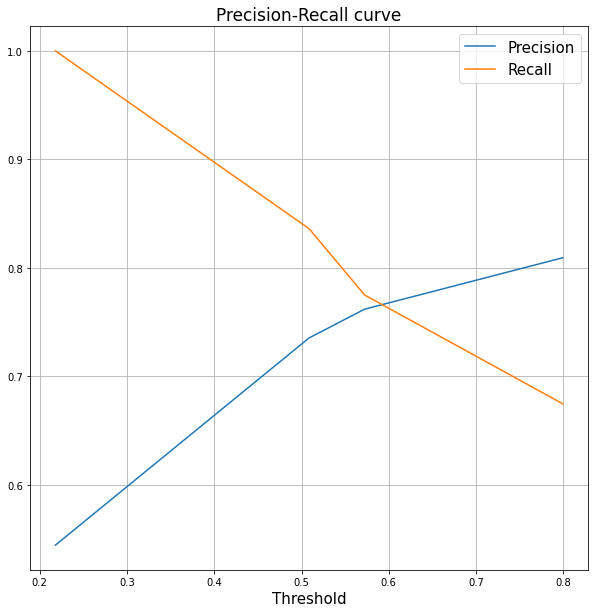

In [ ]:
#Precision-recall curve
prec, rec, thresh = precision_recall_curve(test_labels, predictions_proba[:,1])
plt.figure(figsize=(10, 10))
plt.grid()
plt.plot(thresh, prec[:-1], label="Precision")
plt.plot(thresh, rec[:-1], label="Recall")
plt.xlabel("Threshold", fontsize = 15)
plt.title('Precision-Recall curve',fontsize = 17)
plt.legend(fontsize = 15)
plt.show()

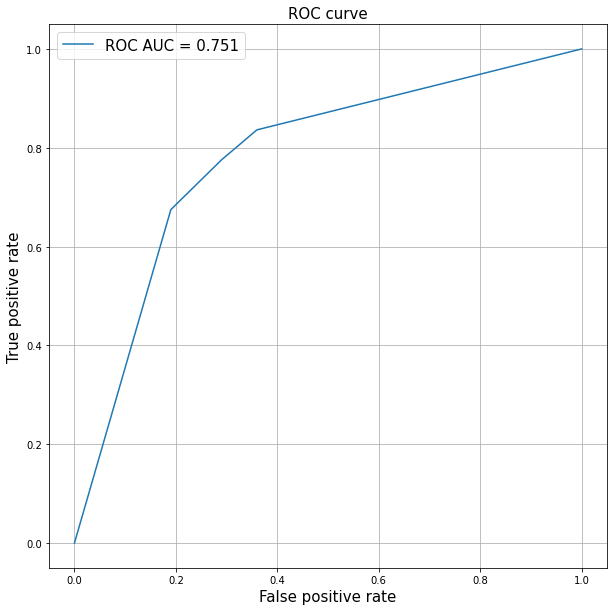

In [ ]:
#ROC curve
fpr, tpr, thr = roc_curve(test_labels, predictions_proba[:,1])
plt.figure(figsize = (10,10))
roc_auc = roc_auc_score(predictions, test_labels)
plt.plot(fpr, tpr, label=u'ROC AUC = ' + str(round(roc_auc,3)))
plt.grid()
plt.xlabel("False positive rate",fontsize = 15)
plt.ylabel("True positive rate",fontsize = 15)
plt.title(u"ROC curve",fontsize = 15)
plt.legend(fontsize = 15)
plt.show()

Task 2.1\
Train classifiers with sklearn library\
Deep Decision Tree with maximum depth equal to 20 

In [ ]:
tree2 = tree.DecisionTreeClassifier(random_state=1, max_depth=19)
tree2.fit(train_data, train_labels)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=19, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

Task 2.2\
Calculation of metrics for trained Deep Decision Tree

In [ ]:
predictions = tree2.predict(test_data)
# Probabilities for the objects in the test sample
predictions_proba = tree2.predict_proba(test_data)
#Precison metric
pres12 = m.precision_score(test_labels, predictions)
print('Precision for Deep Decision Tree is', pres12)
#Recall metric
rec12 = m.recall_score(test_labels, predictions)
print('Recall for Deep Decision Tree is', rec12)
#Accuracy metric
acc12 = m.accuracy_score(test_labels, predictions)
print('Accuracy for Deep Decision Tree is', acc12)
#F1-Score metric
f1_score12 = m.f1_score(test_labels, predictions)
print('F1-Score for Deep Decision Tree is', f1_score12)
#Log-Loss metric
ll12 = m.log_loss(test_labels, predictions)
print('Log-loss for Deep Decision Tree is', ll12)

Precision for Deep Decision Tree is 0.7371007371007371
Recall for Deep Decision Tree is 0.7334963325183375
Accuracy for Deep Decision Tree is 0.7123834886817576
F1-Score for Deep Decision Tree is 0.7352941176470588
Log-loss for Deep Decision Tree is 9.934036295906441


Task 2.3\
Plot precision-recall and ROC curves for Deep Decision Tree

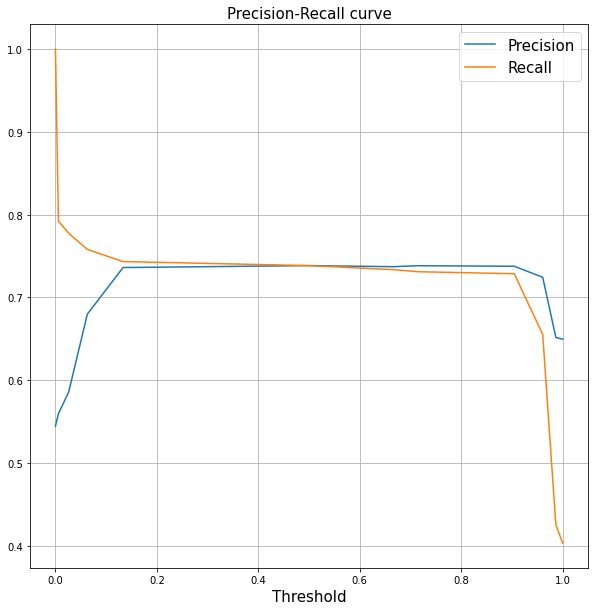

In [ ]:
#Precision-recall curve
prec, rec, thresh = precision_recall_curve(test_labels, predictions_proba[:,1])
plt.figure(figsize=(10, 10))
plt.grid()
plt.plot(thresh, prec[:-1], label="Precision")
plt.plot(thresh, rec[:-1], label="Recall")
plt.xlabel(u"Threshold",fontsize = 15)
plt.title(u'Precision-Recall curve',fontsize = 15)
plt.legend(fontsize = 15)
plt.show()

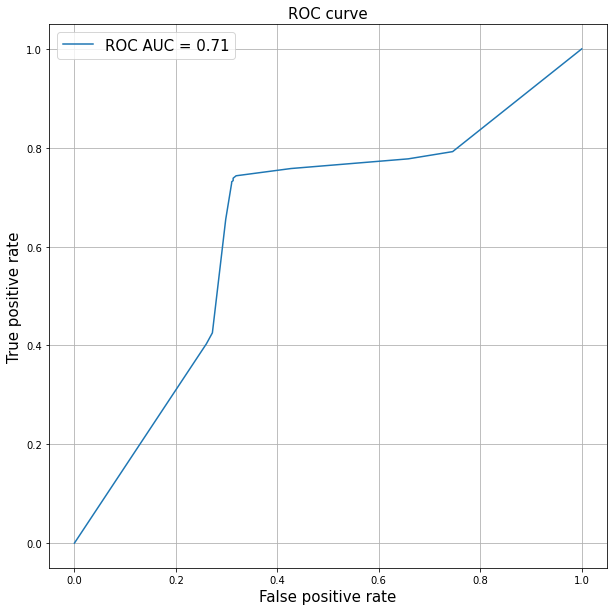

In [ ]:
#ROC curve
fpr, tpr, thr = roc_curve(test_labels, predictions_proba[:,1])
plt.figure(figsize = (10,10))
roc_auc = roc_auc_score(predictions, test_labels)
plt.plot(fpr, tpr, label=u'ROC AUC = ' + str(round(roc_auc,2)))
plt.grid()
plt.xlabel("False positive rate",fontsize = 15)
plt.ylabel("True positive rate",fontsize = 15)
plt.title(u"ROC curve",fontsize = 15)
plt.legend(fontsize = 15)
plt.show()

Task 3.1. \
Train classifiers with sklearn library\
Random Forest on small trees

In [ ]:
forest1 = RandomForestClassifier(n_estimators = 60, max_depth = 2, random_state = 2)
forest1.fit(train_data, train_labels)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=2, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=60,
                       n_jobs=None, oob_score=False, random_state=2, verbose=0,
                       warm_start=False)

Task 3.2\
Calculation of metrics for trained Random Forest on small trees

In [ ]:
predictions = forest1.predict(test_data)
# Probabilities for the objects in the test sample
predictions_proba = forest1.predict_proba(test_data)
#Precison metric
pres21 = m.precision_score(test_labels, predictions)
print('Precision for random Forest on small trees is', pres21)
#Recall metric
rec21 = m.recall_score(test_labels, predictions)
print('Recall for random Forest on small trees is', rec21)
#Accuracy metric
acc21 = m.accuracy_score(test_labels, predictions)
print('Accuracy for random Forest on small trees is', acc21)
#F1-Score metric
f1_score21 = m.f1_score(test_labels, predictions)
print('F1-Score for random Forest on small trees is', f1_score21)
#Log-Loss
ll21 = m.log_loss(test_labels, predictions)
print('Log-loss for random Forest on small trees is', ll21)

Precision for random Forest on small trees is 0.745575221238938
Recall for random Forest on small trees is 0.823960880195599
Accuracy for random Forest on small trees is 0.7509986684420772
F1-Score for random Forest on small trees is 0.7828106852497095
Log-loss for random Forest on small trees is 8.600323754397829


Task 3.3\
Plot precision-recall and ROC curves for trained Random Forest on small trees

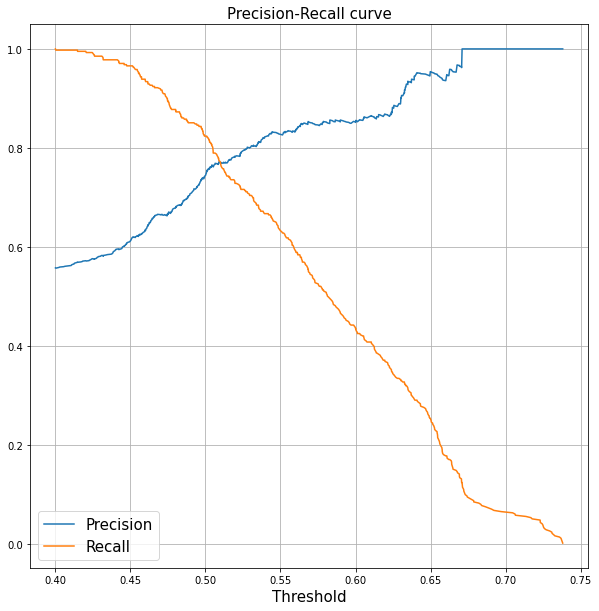

In [ ]:
#Precision-recall curve
prec, rec, thresh = precision_recall_curve(test_labels, predictions_proba[:,1])
plt.figure(figsize=(10, 10))
plt.grid()
plt.plot(thresh, prec[:-1], label="Precision")
plt.plot(thresh, rec[:-1], label="Recall")
plt.xlabel(u"Threshold",fontsize = 15)
plt.title(u'Precision-Recall curve',fontsize = 15)
plt.legend(fontsize = 15)
plt.show()

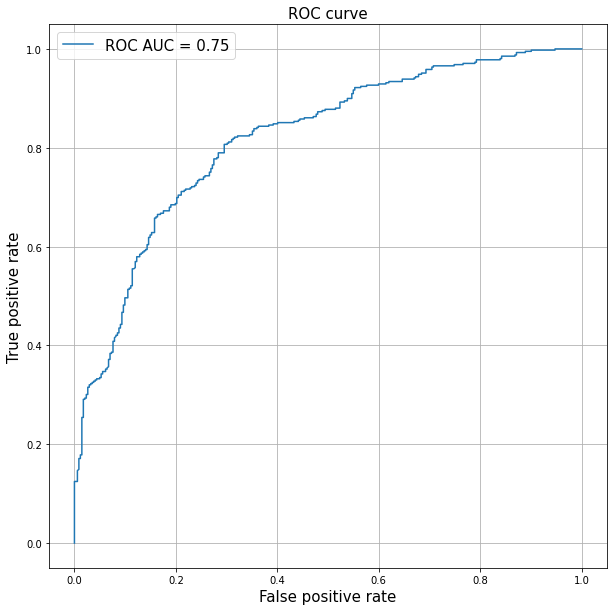

In [ ]:
#ROC curve
fpr, tpr, thr = roc_curve(test_labels, predictions_proba[:,1])
plt.figure(figsize = (10,10))
roc_auc = roc_auc_score(predictions, test_labels)
plt.plot(fpr, tpr, label=u'ROC AUC = ' + str(round(roc_auc,2)))
plt.grid()
plt.xlabel("False positive rate",fontsize = 15)
plt.ylabel("True positive rate",fontsize = 15)
plt.title(u"ROC curve",fontsize = 15)
plt.legend(fontsize = 15)
plt.show()

Task 4.1\
Train classifiers with sklearn library\
Random Forest on deep trees

In [ ]:
forest2 = RandomForestClassifier(n_estimators = 120, max_depth = 17, random_state = 2)
forest2.fit(train_data, train_labels)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=17, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=120,
                       n_jobs=None, oob_score=False, random_state=2, verbose=0,
                       warm_start=False)

Task 4.2\
Calculate metrics for trained Random Forest on deep trees

In [ ]:
predictions = forest2.predict(test_data)
# Probabilities for the objects in the test sample
predictions_proba = forest2.predict_proba(test_data)
#Precison metric
pres22 = m.precision_score(test_labels, predictions)
print('Precision for random Forest on deep trees is', pres22)
#Recall metric
rec22 = m.recall_score(test_labels, predictions)
print('Recall for random Forest on deep trees is', rec22)
#Accuracy metric
acc22 = m.accuracy_score(test_labels, predictions)
print('Accuracy for random Forest on deep trees is', acc22)
#F1-Score metric
f1_score22 = m.f1_score(test_labels, predictions)
print('F1-Score for random Forest on deep trees is', f1_score22)
#Log-Loss metric
ll22 = m.log_loss(test_labels, predictions)
print('Log-loss for random Forest on deep trees is', ll22)

Precision for random Forest on deep trees is 0.835820895522388
Recall for random Forest on deep trees is 0.8215158924205379
Accuracy for random Forest on deep trees is 0.8149134487350199
F1-Score for random Forest on deep trees is 0.8286066584463625
Log-loss for random Forest on deep trees is 6.392733278725671


Task 4.3\
Plot precision-recall and ROC curves for trained Random Forest on deep trees

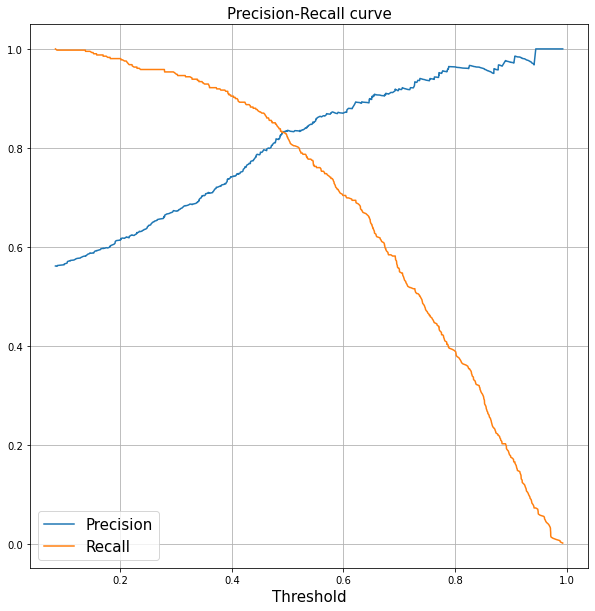

In [ ]:
#Precision-recall curve
prec, rec, thresh = precision_recall_curve(test_labels, predictions_proba[:,1])
plt.figure(figsize=(10, 10))
plt.grid()
plt.plot(thresh, prec[:-1], label="Precision")
plt.plot(thresh, rec[:-1], label="Recall")
plt.xlabel(u"Threshold",fontsize = 15)
plt.title(u'Precision-Recall curve',fontsize = 15)
plt.legend(fontsize = 15)
plt.show()

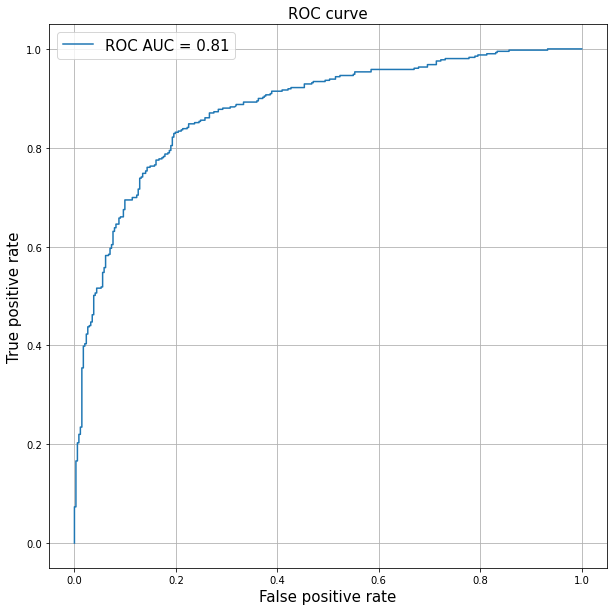

In [ ]:
#ROC curve
fpr, tpr, thr = roc_curve(test_labels, predictions_proba[:,1])
plt.figure(figsize = (10,10))
roc_auc = roc_auc_score(predictions, test_labels)
plt.plot(fpr, tpr, label=u'ROC AUC = ' + str(round(roc_auc,2)))
plt.grid()
plt.xlabel("False positive rate",fontsize = 15)
plt.ylabel("True positive rate",fontsize = 15)
plt.title(u"ROC curve",fontsize = 15)
plt.legend(fontsize = 15)
plt.show()

Task 5.1\
Train a classifier who avoids Type II (False Negative) errors

Random forest was chosen

Raising recall means decreasing FN errors

In [ ]:
for i in range (15,20):
  rf5 = RandomForestClassifier(max_depth=i, class_weight={0: 1, 1: 8}, random_state=0)
  rf5.fit(train_data, train_labels)
  predictions = rf5.predict(test_data)

  rec5 = m.recall_score(test_labels, predictions)
  print('max depth is ', i, 'and recall is',rec5)

max depth is  15 and recall is 0.9364303178484108
max depth is  16 and recall is 0.9364303178484108
max depth is  17 and recall is 0.921760391198044
max depth is  18 and recall is 0.9119804400977995
max depth is  19 and recall is 0.9070904645476773


Best max_depth is 15 with recal = 0.936

In [ ]:
rf5 = RandomForestClassifier(max_depth=15, class_weight={0: 1, 1: 8}, random_state=0)
rf5.fit(train_data, train_labels)
predictions = rf5.predict(test_data)

rec5 = m.recall_score(test_labels, predictions)
print('Recall is',rec5)

Recall is 0.9364303178484108


Task 4.2\
Calculate metrics for Random Forest

In [ ]:
predictions = rf5.predict(test_data)
# Probabilities for the objects in the test sample
#Precison metric
prrf5 = m.precision_score(test_labels, predictions)
print('Precision for RF is', prrf5)
#Recall metric
recrf5 = m.recall_score(test_labels, predictions)
print('Recall for RF is', recrf5)
#Accuracy metric
accrf5 = m.accuracy_score(test_labels, predictions)
print('Accuracy for RF is', accrf5)
#F1-Score metric
f1_scorerf5 = m.f1_score(test_labels, predictions)
print('F1-Score for RF is', f1_scorerf5)
#Log-Loss metric
llrf5 = m.log_loss(test_labels, predictions)
print('Log-loss for RF is', llrf5)

Precision for RF is 0.6524701873935264
Recall for RF is 0.9364303178484108
Accuracy for RF is 0.6937416777629827
F1-Score for RF is 0.7690763052208834
Log-loss for RF is 10.578004911724655


Task 4.3\
Plot precision-recall curve for Random Forest

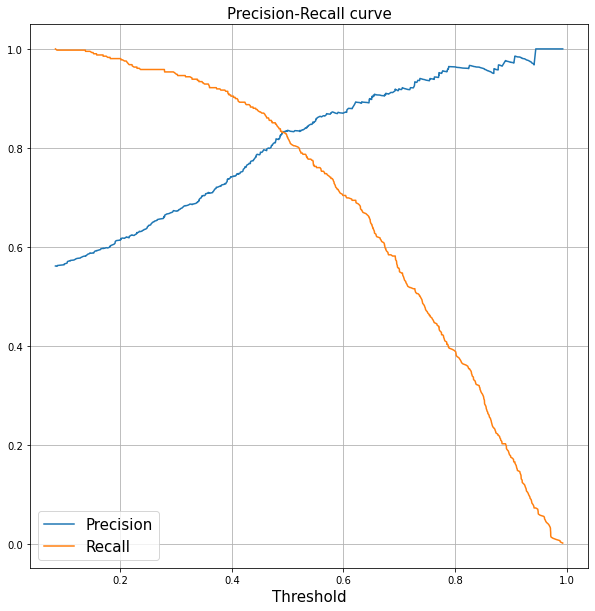

In [ ]:
#Precision-recall curve
prec, rec, thresh = precision_recall_curve(test_labels, predictions_proba[:,1])
plt.figure(figsize=(10, 10))
plt.grid()
plt.plot(thresh, prec[:-1], label="Precision")
plt.plot(thresh, rec[:-1], label="Recall")
plt.xlabel(u"Threshold",fontsize = 15)
plt.title(u'Precision-Recall curve',fontsize = 15)
plt.legend(fontsize = 15)
plt.show()